In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xg

Data Loading and Exploratory Data Analysis

In [15]:
bean_df = pd.read_excel('C:/Users/EMMANUEL/Desktop/adex/DryBeanDataset/Dry_Bean_Dataset.xlsx')
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [16]:
bean_df.shape

(13611, 17)

- There are 13611 rows and and a total of 17 features.

In [17]:
bean_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [18]:
bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [19]:
bean_df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

- No missing values in the dataset but we have to take repetition of data into consideration by checking if there is any duplicated data in the dataset

In [20]:
bean_df.duplicated().sum()

68

- There is a repetition of duplicated records in the dataset which amount to 68 rows,  Hence the duplicates will be dropped

In [27]:
bean_df = bean_df.drop_duplicates()

In [28]:
bean_df.duplicated().sum()

0

**- Count and distribution of all beans categories:**

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


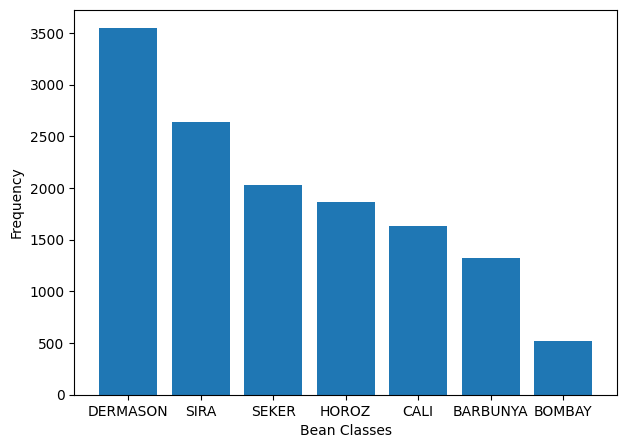

In [36]:
class_features = bean_df.Class.value_counts()
print(class_features)

plt.figure(figsize=(7, 5))
plt.bar(class_features.index, class_features.values)
plt.xlabel('Bean Classes')
plt.ylabel('Frequency')
plt.show()

- The plot above shows the count of each variables of the beans categories and there is a slight imbalance in the data needed to be handled to make it a balanced data

**- Boxplot of numerical features for each type of bean**

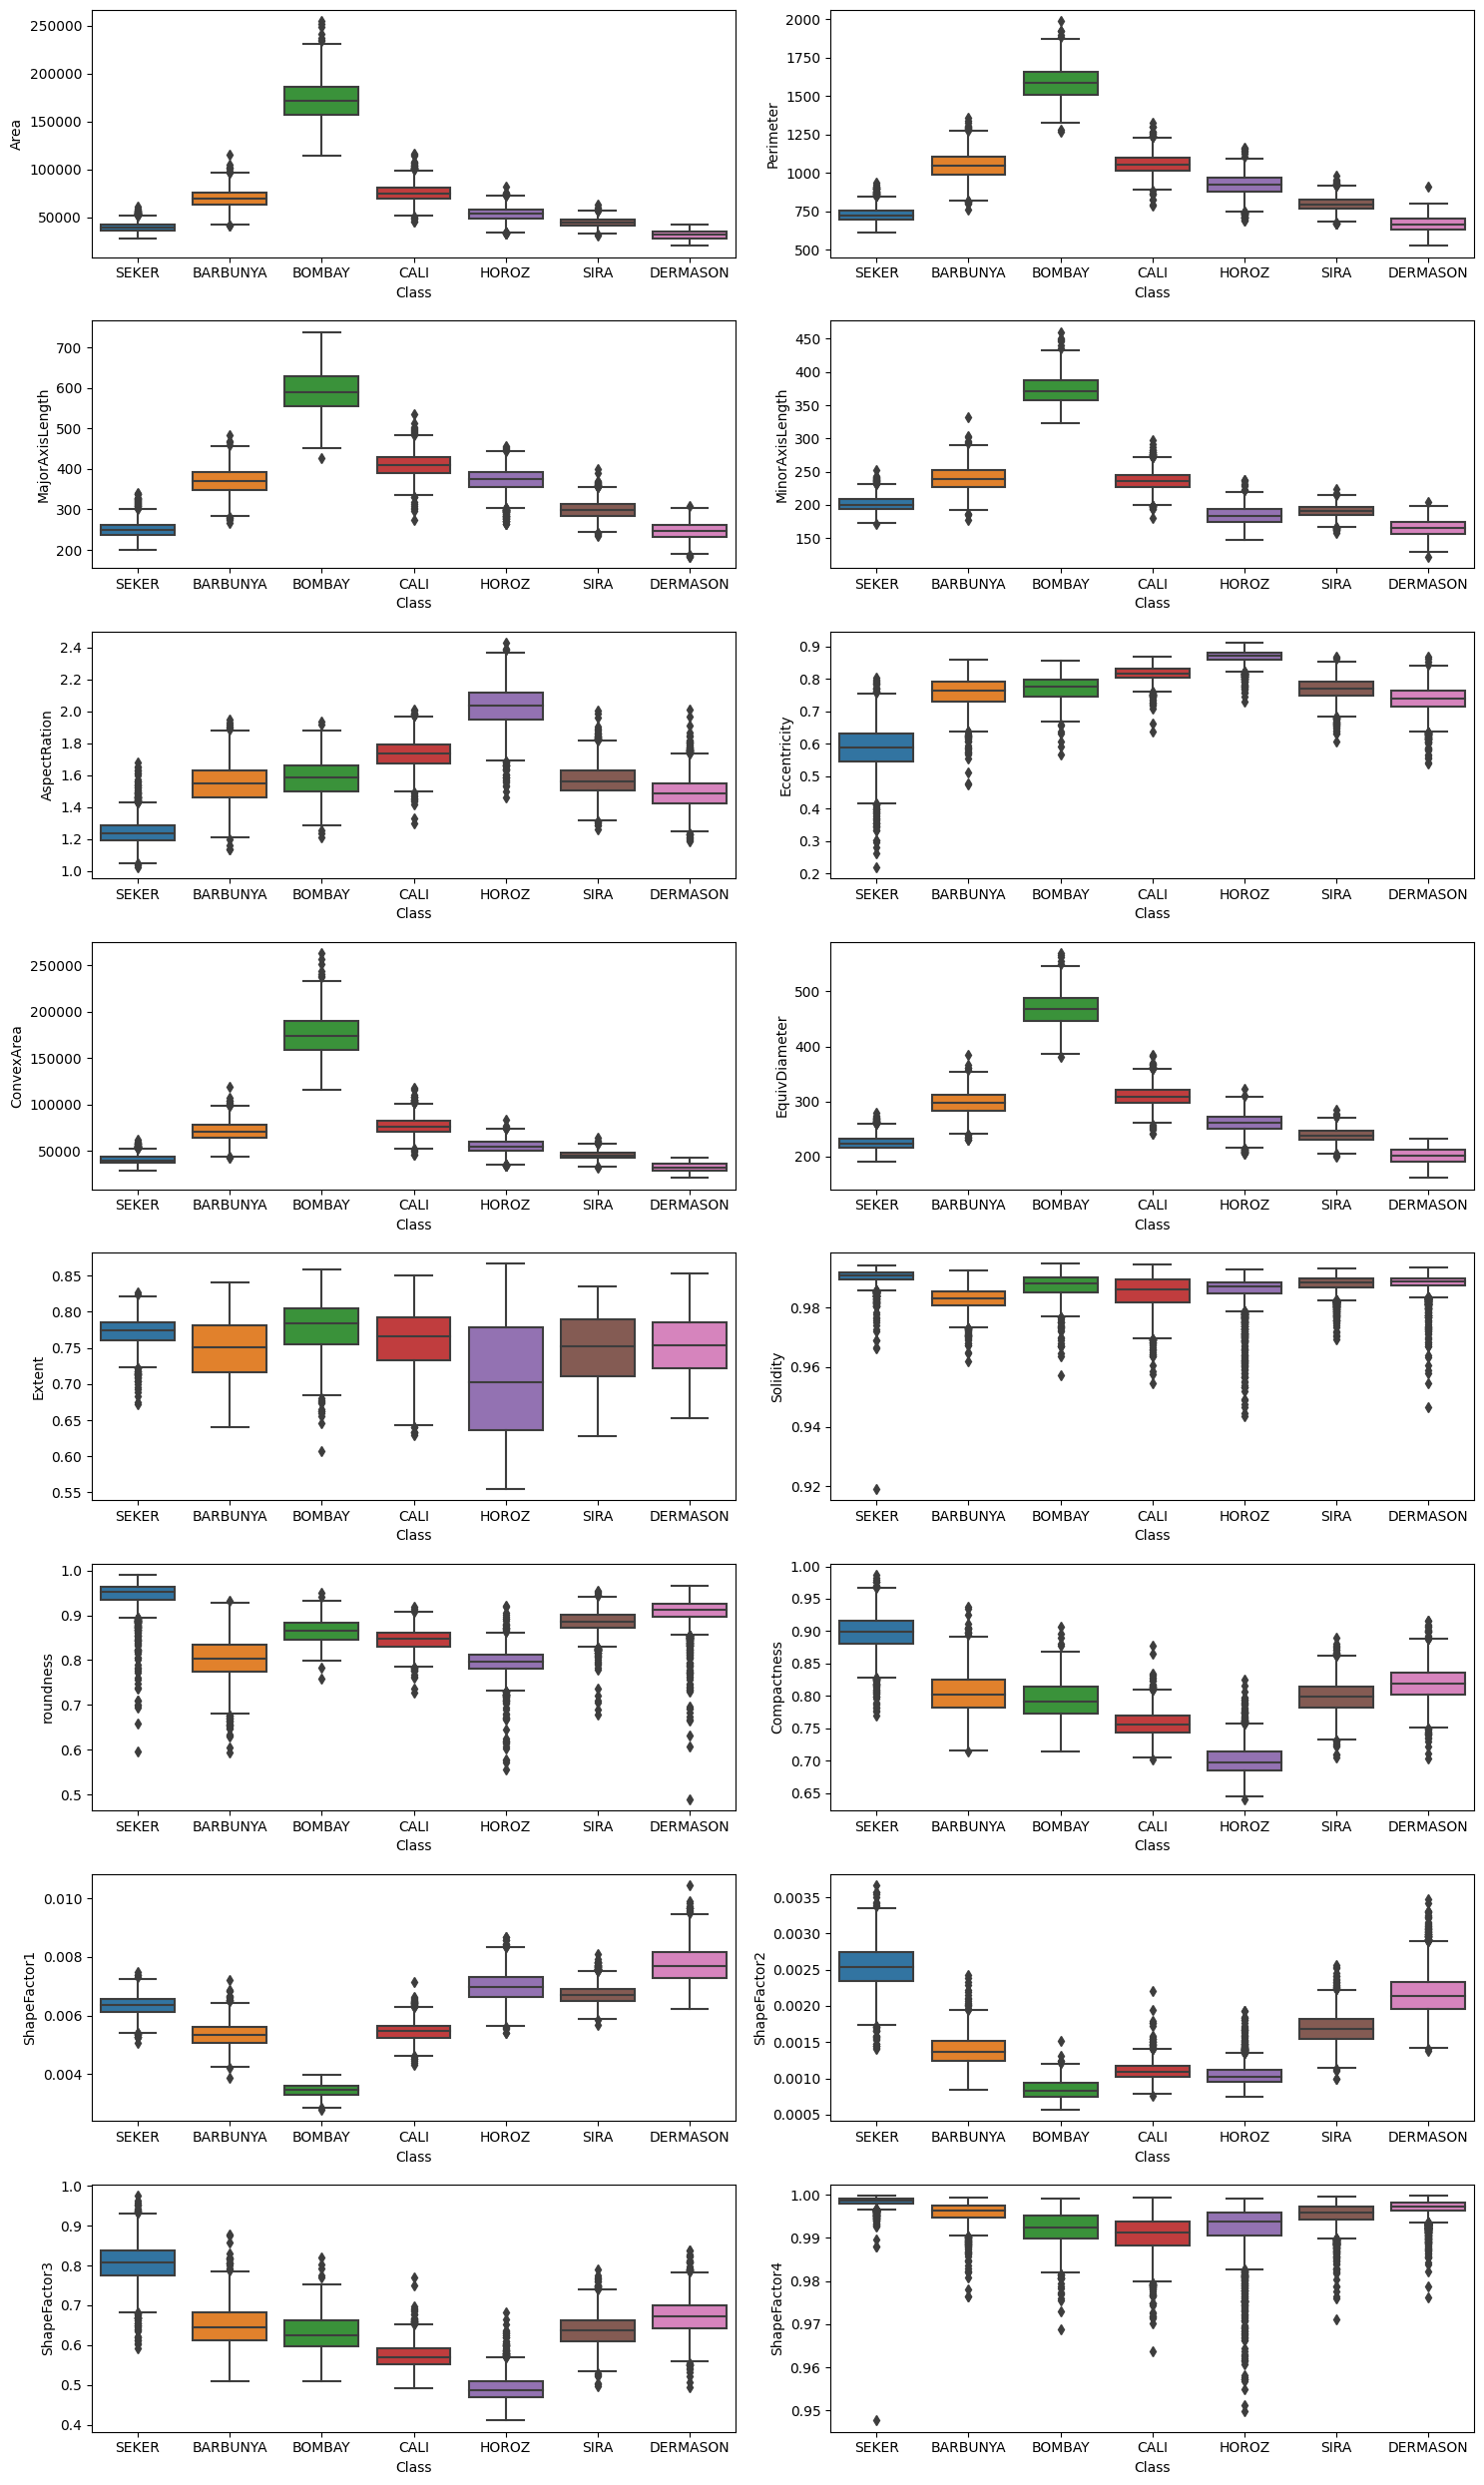

In [39]:
Numeric_cols = bean_df.drop(columns=['Class']).columns
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=bean_df['Class'], y= bean_df[variable], ax=subplot)
plt.tight_layout()

- The "Bombay" & "Horoz" classes are distinct from other classes.

- Label Encoding: Target Column 

In [56]:
encode = LabelEncoder()

bean_df['class_labels'] = encode.fit_transform(bean_df.Class)
bean_df.class_labels.unique()

array([5, 0, 1, 2, 4, 6, 3])

- Feature Scaling

In [58]:
x = bean_df.drop(["Class", "class_labels"], axis=1)
y = bean_df['class_labels']

In [60]:
scale = StandardScaler()

x_scaled = scale.fit_transform(x)
x_scaled

array([[-0.83879977, -1.13966273, -1.30197615, ...,  2.39827994,
         1.92481096,  0.83867856],
       [-0.82726577, -1.01052862, -1.39116937, ...,  3.09747107,
         2.69144645,  0.77114139],
       [-0.80528652, -1.07530293, -1.24780735, ...,  2.23108594,
         1.8401498 ,  0.91741775],
       ...,
       [-0.37117925, -0.44557909, -0.44700409, ...,  0.28388754,
         0.32988743,  0.38852873],
       [-0.37090706, -0.42481666, -0.42552883, ...,  0.22301752,
         0.24222869,  0.03311486],
       [-0.37049878, -0.38542487, -0.2884744 , ..., -0.13337374,
        -0.28505378,  0.71346236]])

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

In [63]:
rand = RandomForestClassifier(criterion='gini')

rand.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
rand.score(x_test, y_test)

0.926172019195275